# NLP : Sentiment Analysis of Alexa Amazon Reviews


## About the Data

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.


You can use this data to analyze Amazon’s Alexa product ; discover insights into consumer reviews and assist with machine learning models.You can also train your machine models for sentiment analysis and analyze customer reviews how many positive reviews ? and how many negative reviews ?

## Source
Amazon's website

In [1]:
import numpy as np 
import pandas as pd 
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_table(r'C:\Users\kambl\Downloads\amazon_alexa.tsv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.shape

(3150, 5)

In [5]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
df["rating"].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [7]:
df['review size'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,review size
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


C:\Users\kambl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review size'>

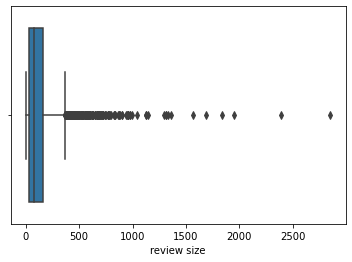

In [8]:
sns.boxplot(df['review size'])


In [9]:
df['review size'].max()

2851

In [10]:
df[df['review size'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

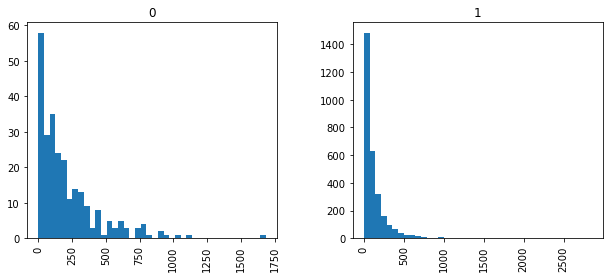

In [11]:
df.hist(column='review size', by='feedback', bins=40,figsize=(10,4))


In [12]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i] )
    review=review.lower() #lower case
    review=review.split() #splitting word (Tokenization)
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #removing stop words
    review=' '.join(review)
    corpus.append(review)

In [13]:
# creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=df.iloc[:,4].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [16]:
y_pred_train = classifier.predict(X_train)

In [17]:
y_pred_test = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_test)

In [22]:
conf_mat

array([[ 18,  36],
       [  0, 576]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [24]:
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred_train))

Accuracy: 0.991


In [25]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_test))

Accuracy: 0.943


In [26]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test))

Precision: 0.941


In [28]:
print('Recall: %.3f' % recall_score(y_test, y_pred_test)) #No false negative


Recall: 1.000


In [30]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred_test))

F1 Score: 0.970
